## Участник 2 — Описательная статистика (Stage 2)

### Цель
- Проанализировать числовые признаки (Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age, DiabetesPedigreeFunction, Pregnancies).
- Построить гистограммы и boxplot.
- Коротко интерпретировать: где есть асимметрия, выбросы, длинные хвосты.
- Для категориального признака `Outcome` — проверить баланс классов (связано с Участником 1).

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

df = pd.read_csv("diabetes_stage1.csv")

print("Размерность:", df.shape)
print("Типы данных:")
df.dtypes

Размерность: (768, 9)
Типы данных:


Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## 1. Описательная статистика (числовые признаки)
Посмотрим основные статистики для количественных признаков:
- count (кол-во наблюдений),
- mean (среднее), std (стандартное отклонение),
- min, 25%, 50% (медиана), 75%, max.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 2. Визуализация распределений числовых признаков

Для каждого признака построим:
- **Гистограмму (histplot)** для оценки распределения.
- **Boxplot** для выявления выбросов и асимметрии.

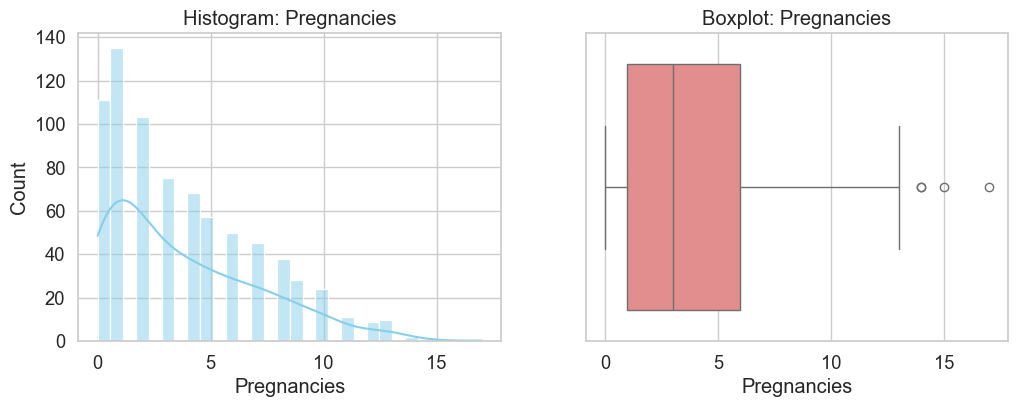

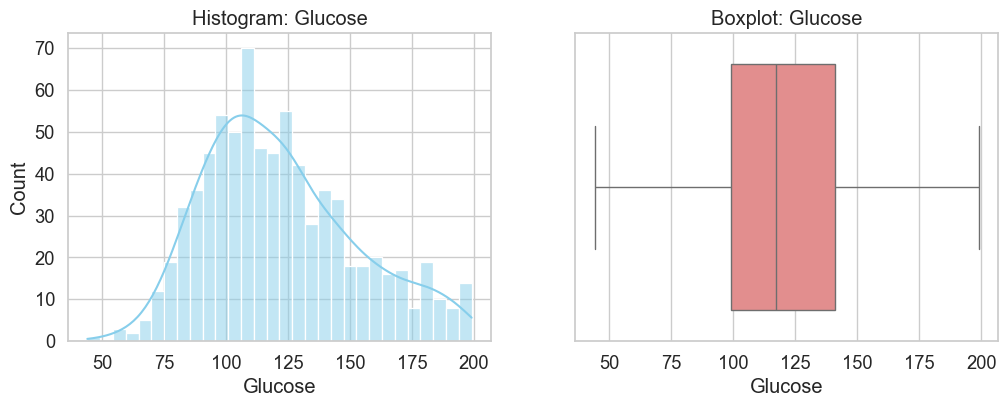

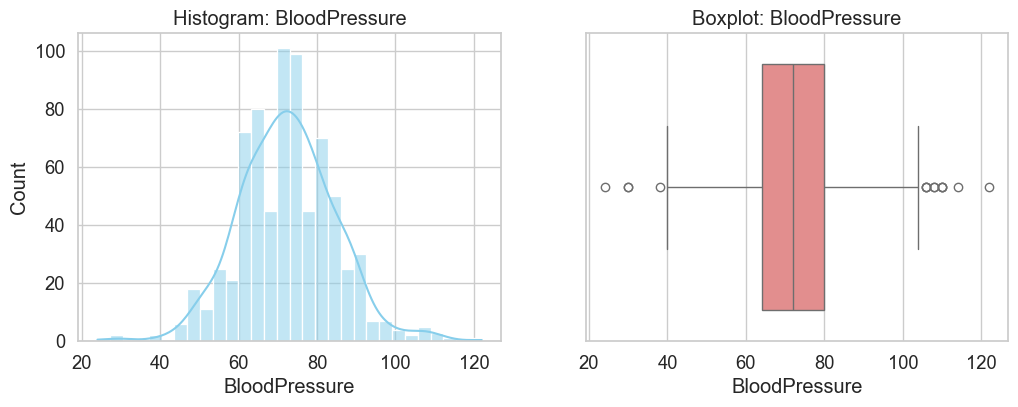

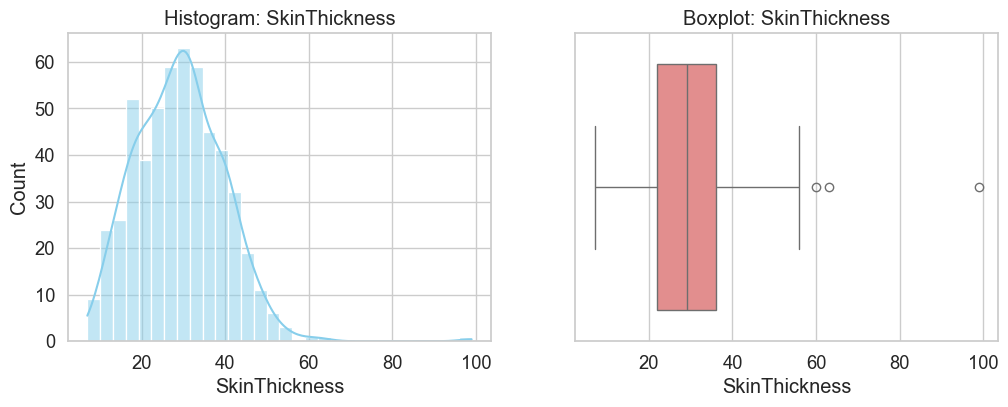

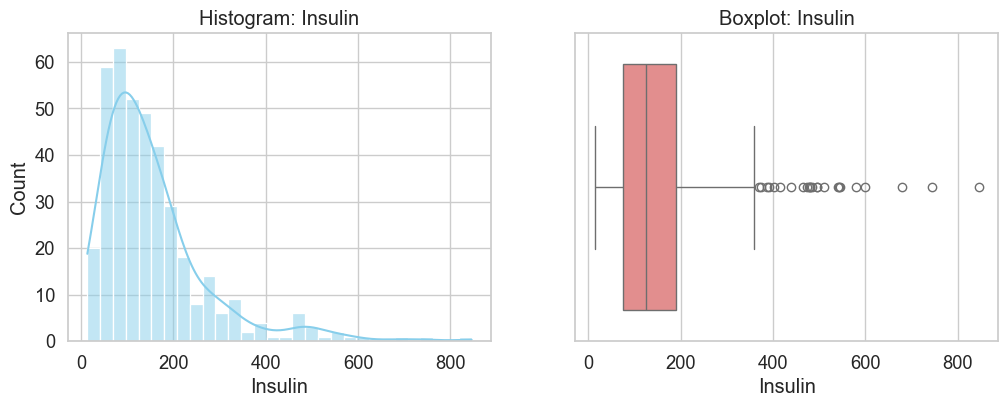

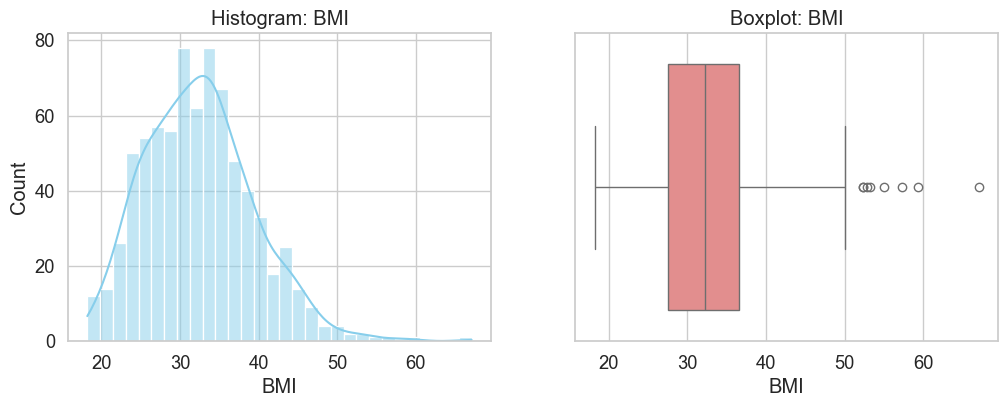

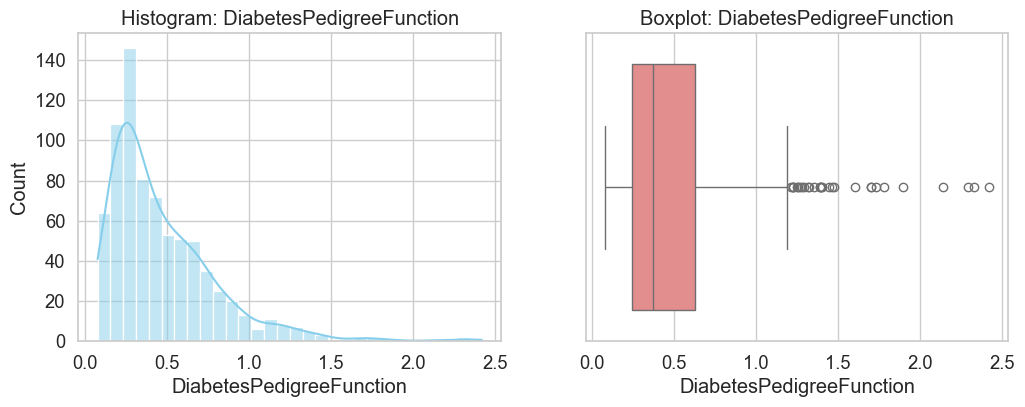

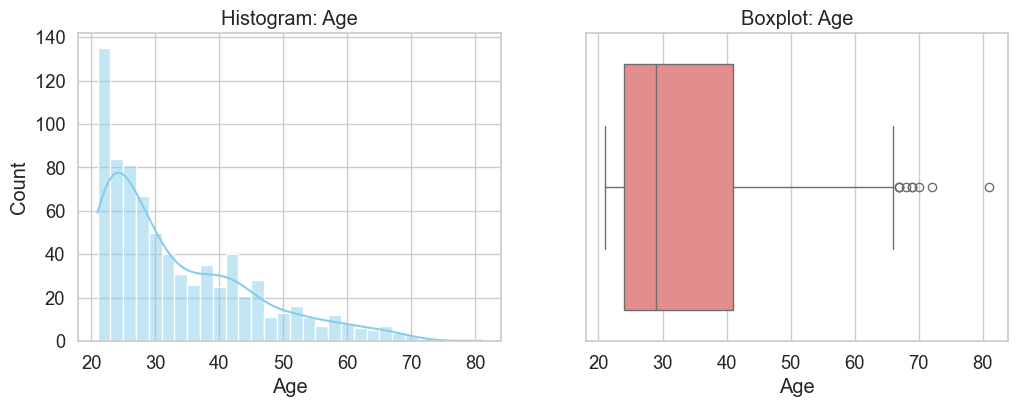

In [20]:
numeric_cols = ["Pregnancies", "Glucose", "BloodPressure",
                "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Гистограмма + KDE
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="lightcoral")
    axes[1].set_title(f"Boxplot: {col}")

    plt.show()

# Анализ распределения признаков диабета

На основе предыдущего анализа были получены следующие характеристики признаков:

| Признак                     | Асимметрия               | Выбросы           | Длинные хвосты       | Интерпретация |
|-------------------------------|-------------------------|-----------------|--------------------|---------------|
| **Pregnancies**              | Правая (сильная)        | Вверх            | Правый хвост        | Много женщин с 1-3 беременностями, немного с большим количеством |
| **Glucose**                  | Правая (легкая)         | Нет              | Нет (или короткий)  | Распределение близко к нормальному, равномерное |
| **BloodPressure**            | Слабая                  | В обе стороны    | Нет                 | Симметричное распределение, есть аномально низкие и высокие значения |
| **SkinThickness**            | Симметричное            | Вверх            | Правый хвост        | Центр около 29, но есть аномально высокие значения |
| **Insulin**                  | Правая (сильная)        | Вверх            | Длинный правый хвост | Большинство значений до 190, есть экстремально высокие |
| **BMI**                      | Слабая                  | Вверх            | Правый хвост        | Распределение нормальное, есть пациенты с очень высоким ИМТ |
| **DiabetesPedigreeFunction** | Правая (сильная)        | Вверх            | Длинный правый хвост | Большинство значений низкие, немного очень высоких |
| **Age**                      | Правая (умеренная)      | Вверх            | Правый хвост        | Преобладают молодые пациенты (до 41 года), есть пожилые |

---

## Ключевые наблюдения

- **Сильная правосторонняя асимметрия:** `Pregnancies`, `Insulin`, `DiabetesPedigreeFunction`
- **Выбросы преимущественно вверх:** почти все признаки имеют аномально высокие значения
- **Наиболее проблемные признаки:**
  - `Insulin` (сильная асимметрия + выбросы)
  - `SkinThickness` (выбросы + пропуски)
- **Наиболее стабильные признаки:**
  - `Glucose` (равномерное распределение без выбросов)
  - `BMI` (слабая асимметрия и минимальные выбросы)


## 3. Категориальные признаки
Для датасета `diabetes` главным категориальным признаком является:
- **Outcome** (0 = нет диабета, 1 = диабет).

Посмотрим частоты классов.

,count,pct
Outcome,,
0,500,65.1
1,268,34.9


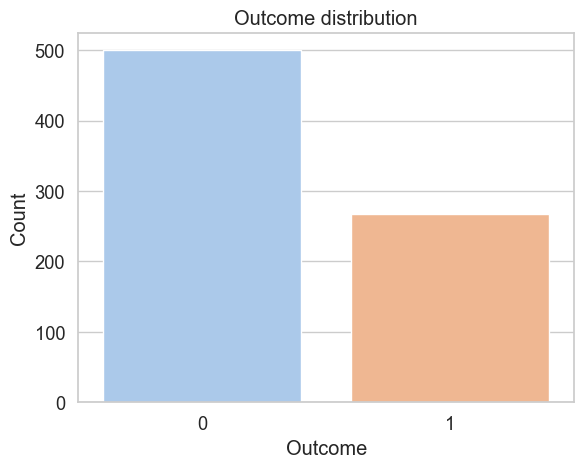

In [21]:
out_counts = df['Outcome'].value_counts()
out_pct = (out_counts / len(df) * 100).round(2)

display(pd.DataFrame({"count": out_counts, "pct": out_pct}))

sns.barplot(x=out_counts.index, y=out_counts.values, hue=out_counts.index, palette="pastel", legend=False)
plt.title("Outcome distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

### Наблюдения (категориальные признаки)
- Класс **0 (нет диабета)** встречается чаще (~65%).
- Класс **1 (диабет)** составляет около 35%.
- Небольшой дисбаланс есть, но он не критичный для анализа.

## Итоговые выводы участника 2:
1. Многие числовые признаки имеют асимметричное распределение и выбросы (особенно Insulin, Glucose).
2. У ряда признаков присутствует значительная доля пропусков (Insulin, SkinThickness).
3. Распределение классов по `Outcome` несбалансировано, но не критично (65% против 35%).
4. Дальнейшие шаги:
   - Участник 3 проверит взаимосвязи между признаками и целевой переменной.
   - Участник 4 займётся обработкой пропусков и кодированием признаков.
